<br>
<br>
<div style="text-align: center; font-weight: 700; font-size: 64px;">
    Jaquet Droz
</div>
<br>
<br>


<img src='R.png' style='max-width: 500px; height: 250px'>
<br>
<br>

<br>
<br>
<div style="text-align: center; font-weight: 700; font-size: 56px;">
    Visualization Part
</div>
<br>
<br>

In [1]:
# !pip install plotly

In [2]:
# Import necessary libraries and modules for data manipulation, visualization, web scraping, and regular expressions.
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import pandas as pd



import plotly.graph_objects as go
import ipywidgets as widgets
from IPython.display import display

In [3]:
#Reading the data from a csv file
df = pd.read_csv('df_watches_data.csv')

#Seeing the dataframe
df

field name reference_number  \
0        value      J0328330011   
1        value      J0328330011   
2        value       J013523242   
3        value       J013523242   
4        value      J0135230011   
..         ...              ...   
126      value       J013013281   
127      value       J013034240   
128      value       J013013200   
129      value       J013033200   
130      value       J030033240   

                                             watch_URL  type        brand  \
0    https://www.jaquet-droz.com/en/watches/automat...   NaN  Jaquet Droz   
1    https://www.jaquet-droz.com/en/watches/automat...   NaN  Jaquet Droz   
2    https://www.jaquet-droz.com/en/watches/grande-...   NaN  Jaquet Droz   
3    https://www.jaquet-droz.com/en/watches/grande-...   NaN  Jaquet Droz   
4    https://www.jaquet-droz.com/en/watches/grande-...   NaN  Jaquet Droz   
..                                                 ...   ...          ...   
126  https://www.jaquet-droz.com/en/watches/grande-...   NaN  Jaquet Droz   
127  https://www.jaquet-droz.com/en/watches/grande-...   NaN  Jaquet Droz   
128  https://www.jaquet-droz.com/en/watches/grande-...   NaN  Jaquet Droz   
129  https://www.jaquet-droz.com/en/watches/grande-...   NaN  Jaquet Droz   
130  https://www.jaquet-droz.com/en/watches/sw/tour...   NaN  Jaquet Droz   

     year_introduced    parent_model                specific_model  nickname  \
0                NaN      Timepieces  The Rolling Stones Automaton       NaN   
1                NaN      Timepieces  The Rolling Stones Automaton       NaN   
2                NaN      Timepieces             Tourbillon Skelet       NaN   
3                NaN      Timepieces             Tourbillon Skelet       NaN   
4                NaN      Timepieces       Tourbillon Skelet Skull       NaN   
..               ...             ...                           ...       ...   
126              NaN  GRANDE SECONDE            Tourbillon Jadeite       NaN   
127              NaN  GRANDE SECONDE    Tourbillon Côtes de Genève       NaN   
128              NaN  GRANDE SECONDE                    Tourbillon       NaN   
129              NaN  GRANDE SECONDE       Tourbillon Ivory Enamel       NaN   
130              NaN              SW                 Tourbillon SW       NaN   

     marketing_name  ...                                  bracelet_material  \
0               NaN  ...             Fabric with printed patterns in rubber   
1               NaN  ...             Fabric with printed patterns in rubber   
2               NaN  ...              Rolled-edge hand-made black alligator   
3               NaN  ...              Rolled-edge hand-made black alligator   
4               NaN  ...                                       Rubber strap   
..              ...  ...                                                ...   
126             NaN  ...                  Rolled-edge hand-made green satin   
127             NaN  ...  Rolled-edge hand-made black alligator leather ...   
128             NaN  ...  Rolled-edge hand-made black alligator leather ...   
129             NaN  ...  Rolled-edge hand-made black alligator leather ...   
130             NaN  ...  Rolled-edge hand made inserted black alligator...   

                                        bracelet_color  \
0               Fabric with printed patterns in rubber   
1               Fabric with printed patterns in rubber   
2                Rolled-edge hand-made black alligator   
3                Rolled-edge hand-made black alligator   
4                                         Rubber strap   
..                                                 ...   
126                  Rolled-edge hand-made green satin   
127  Rolled-edge hand-made black alligator leather ...   
128  Rolled-edge hand-made black alligator leather ...   
129  Rolled-edge hand-made black alligator leather ...   
130  Rolled-edge hand made inserted black alligator...   

                                            clasp_t

## parent model

#### How many unique value in each parent models there are in the website

In [4]:
# Compute the count of each unique value in the 'parent_model' column of the DataFrame
parent_model_counts = df['parent_model'].value_counts().reset_index()

# Rename the columns of the DataFrame
parent_model_counts.columns = ['Parent Model', 'Count']

# Create a bar plot using Plotly Express
fig = px.bar(parent_model_counts, x='Parent Model', y='Count', title='What is the count of each Parent Model?', color='Count',
             color_continuous_scale='Blues_r')

# Update the layout of the plot to set the background color
fig.update_layout(
    plot_bgcolor='#F2F2F2'  # Light gray color
)

# Display the plot
fig.show()

**As we can see from the graph, Timepieces has the highest number of watches compared to the other parent models. Also, ATELIERS D'ART and SW have only one in them**

## power_reserve

### How many watches have power reserves in each parent models?



<p style='font-size: 16px; color: red;'>Note: Please click on next graph to display the graphs.</p>

In [5]:
grouped_df = df.groupby(['parent_model', 'power_reserve']).size().reset_index(name='count')


# Create a list of parent models
parent_models = grouped_df['parent_model'].unique()

# Create a dictionary to store the figures for each parent model
figures = {}

# Loop through each parent model and create a figure
for model in parent_models:
    subset_df = grouped_df[grouped_df['parent_model'] == model]
    subset_df = subset_df.sort_values('count', ascending=False)  # Sort the data by count in descending order
    x_labels = subset_df['power_reserve']
    counts = subset_df['count']

    fig = go.Figure(data=go.Bar(x=x_labels, y=counts))
    fig.update_layout(
        title=f'Count of Power Reserve for Parent Model: {model}',
        xaxis_title='Power Reserve',
        yaxis_title='Count'
    )

    # Store the figure in the dictionary
    figures[model] = fig

# Create a button and output widget
button = widgets.Button(description='Next Graph')
output = widgets.Output()

# Initialize a counter
counter = 0

# Define a function to handle button clicks
def on_button_click(b):
    global counter
    counter += 1

    # Get the current parent model
    model = parent_models[counter % len(parent_models)]

    # Clear the output widget
    output.clear_output()

    # Display the corresponding figure
    with output:
        display(figures[model])

# Attach the function to the button's click event
button.on_click(on_button_click)

# Display the button and output widget
display(button)
display(output)

Button(description='Next Graph', style=ButtonStyle())

Output()



<p style='font-size: 16px; color: red;'>Note: In case the previous graphs did not show with you, these are the same with seaborn and matplotlib libraries.</p>

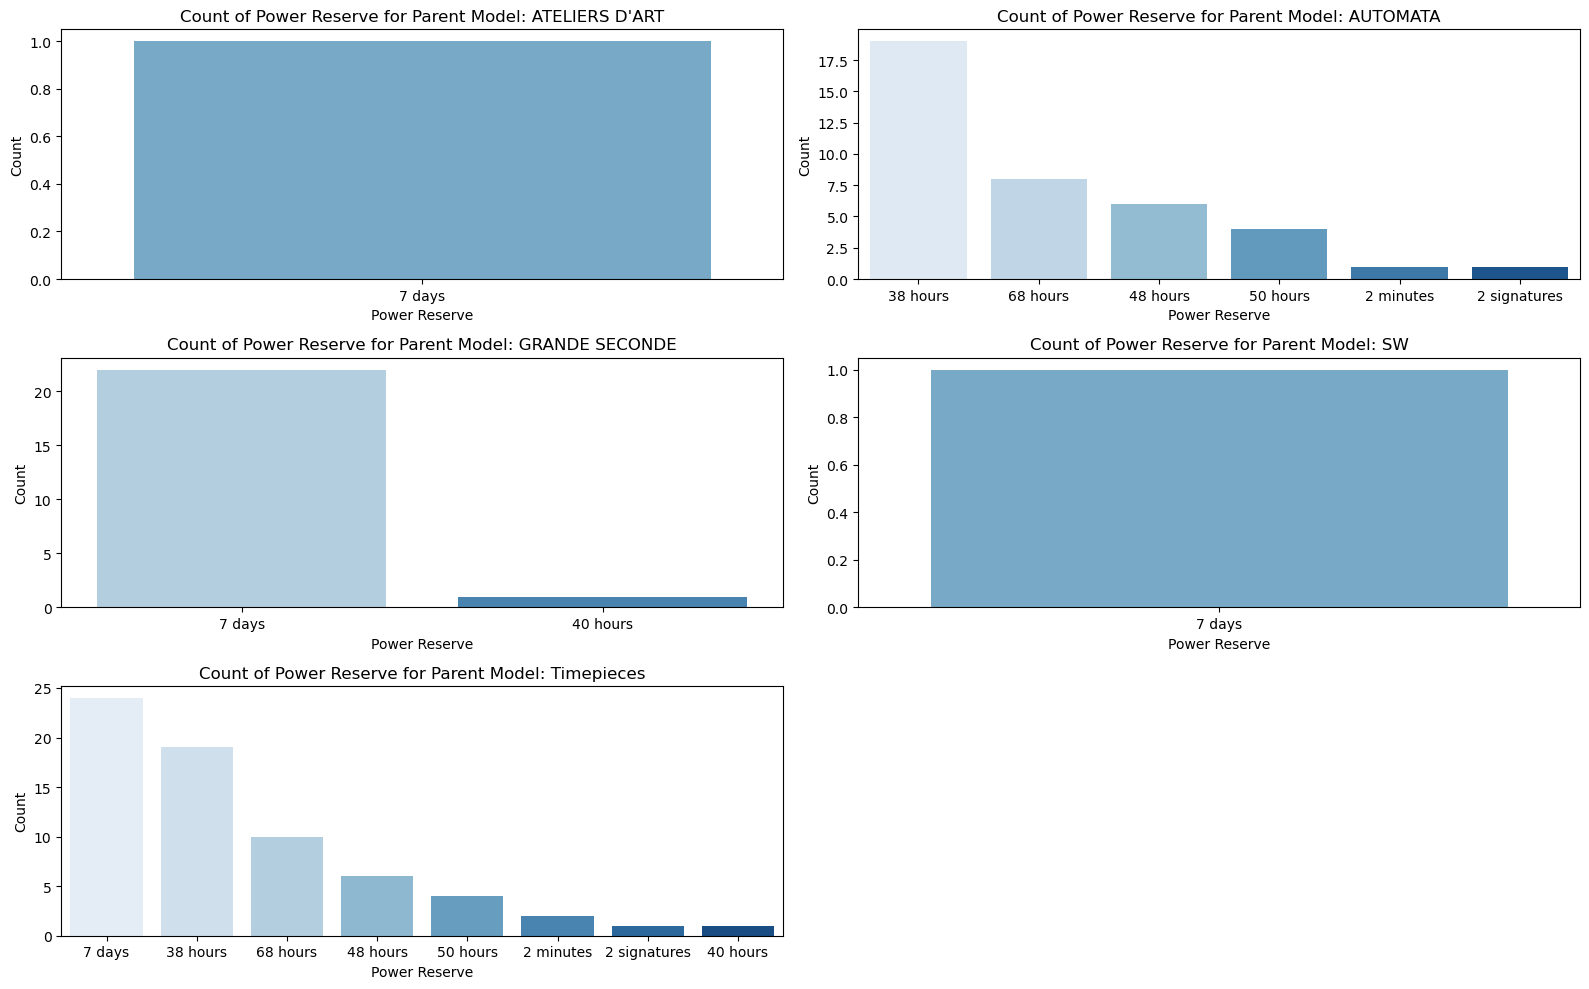

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create a list of parent models
parent_models = grouped_df['parent_model'].unique()

# Calculate the number of rows needed
num_rows = len(parent_models) // 2 + len(parent_models) % 2

# Create a figure with subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(16, 10))

# Loop through each parent model and create two graphs in each row
for i, model in enumerate(parent_models):
    row = i // 2
    col = i % 2

    subset_df = grouped_df[grouped_df['parent_model'] == model]
    subset_df = subset_df.sort_values('count', ascending=False)

    ax = axes[row, col]  # Select the corresponding subplot

    # Create the grouped bar plot using seaborn
    colors = sns.color_palette('Blues', len(subset_df))  # Generate a color palette
    sns.barplot(data=subset_df, x='power_reserve', y='count', ax=ax, palette=colors)

    ax.set_title(f'Count of Power Reserve for Parent Model: {model}')
    ax.set_xlabel('Power Reserve')
    ax.set_ylabel('Count')

# Remove any empty subplots
if len(parent_models) % 2 != 0:
    fig.delaxes(axes[-1, -1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

## water resistance

### How many watches have water resistance feature in each parent models?

In [7]:
df['water_resistance'].value_counts()

water_resistance
To 3 bar (30 meters)       76
No                         32
3 bar (30 meters)          10
Up to 3 bar (30 meters)     4
To 5 bar (50 meters)        2
Name: count, dtype: int64

In [8]:
# Group the DataFrame by 'parent_model' and 'water_resistance', and calculate the size/count of each group
grouped_df2 = df.groupby(['parent_model', 'water_resistance']).size().reset_index(name='count')

#Seeing the DataFrame
grouped_df2

parent_model         water_resistance  count
0   ATELIERS D'ART        3 bar (30 meters)      1
1         AUTOMATA                       No     16
2         AUTOMATA     To 3 bar (30 meters)     19
3         AUTOMATA  Up to 3 bar (30 meters)      2
4   GRANDE SECONDE        3 bar (30 meters)      3
5   GRANDE SECONDE     To 3 bar (30 meters)     19
6               SW     To 5 bar (50 meters)      1
7       Timepieces        3 bar (30 meters)      6
8       Timepieces                       No     16
9       Timepieces     To 3 bar (30 meters)     38
10      Timepieces     To 5 bar (50 meters)      1
11      Timepieces  Up to 3 bar (30 meters)      2



<p style='font-size: 16px; color: red;'>Note: Please click on dropdown menu to display the graphs.</p>

In [10]:
# Create a list of parent models
parent_models = grouped_df2['parent_model'].unique()

# Create a dictionary to store the figures for each parent model
figures = {}

# Loop through each parent model and create a figure
for model in parent_models:
    subset_df = grouped_df2[grouped_df2['parent_model'] == model]
    subset_df = subset_df.sort_values('count', ascending=False)  # Sort the data by count in descending order
    x_labels = subset_df['water_resistance']
    counts = subset_df['count']

    fig = go.Figure(data=go.Pie(labels=x_labels, values=counts))
    fig.update_layout(
        title=f'Count of Water Resistance for Parent Model: {model}',
    )

    # Store the figure in the dictionary
    figures[model] = fig

# Create a dropdown widget with choices
dropdown = widgets.Dropdown(options=parent_models, description='Select Model')

# Create an output widget
output = widgets.Output()

# Define a function to handle dropdown value changes
def on_dropdown_change(change):
    model = change.new  # Get the selected model from the dropdown

    # Clear the output widget
    output.clear_output()

    # Display the corresponding figure
    with output:
        display(figures[model])

# Attach the function to the dropdown's value change event
dropdown.observe(on_dropdown_change, names='value')

# Display the dropdown and output widget
display(dropdown)
display(output)

Dropdown(description='Select Model', options=("ATELIERS D'ART", 'AUTOMATA', 'GRANDE SECONDE', 'SW', 'Timepiece…

Output()



<p style='font-size: 16px; color: red;'>Note: In case the previous graphs did not show with you, these are the same with seaborn and matplotlib libraries.</p>

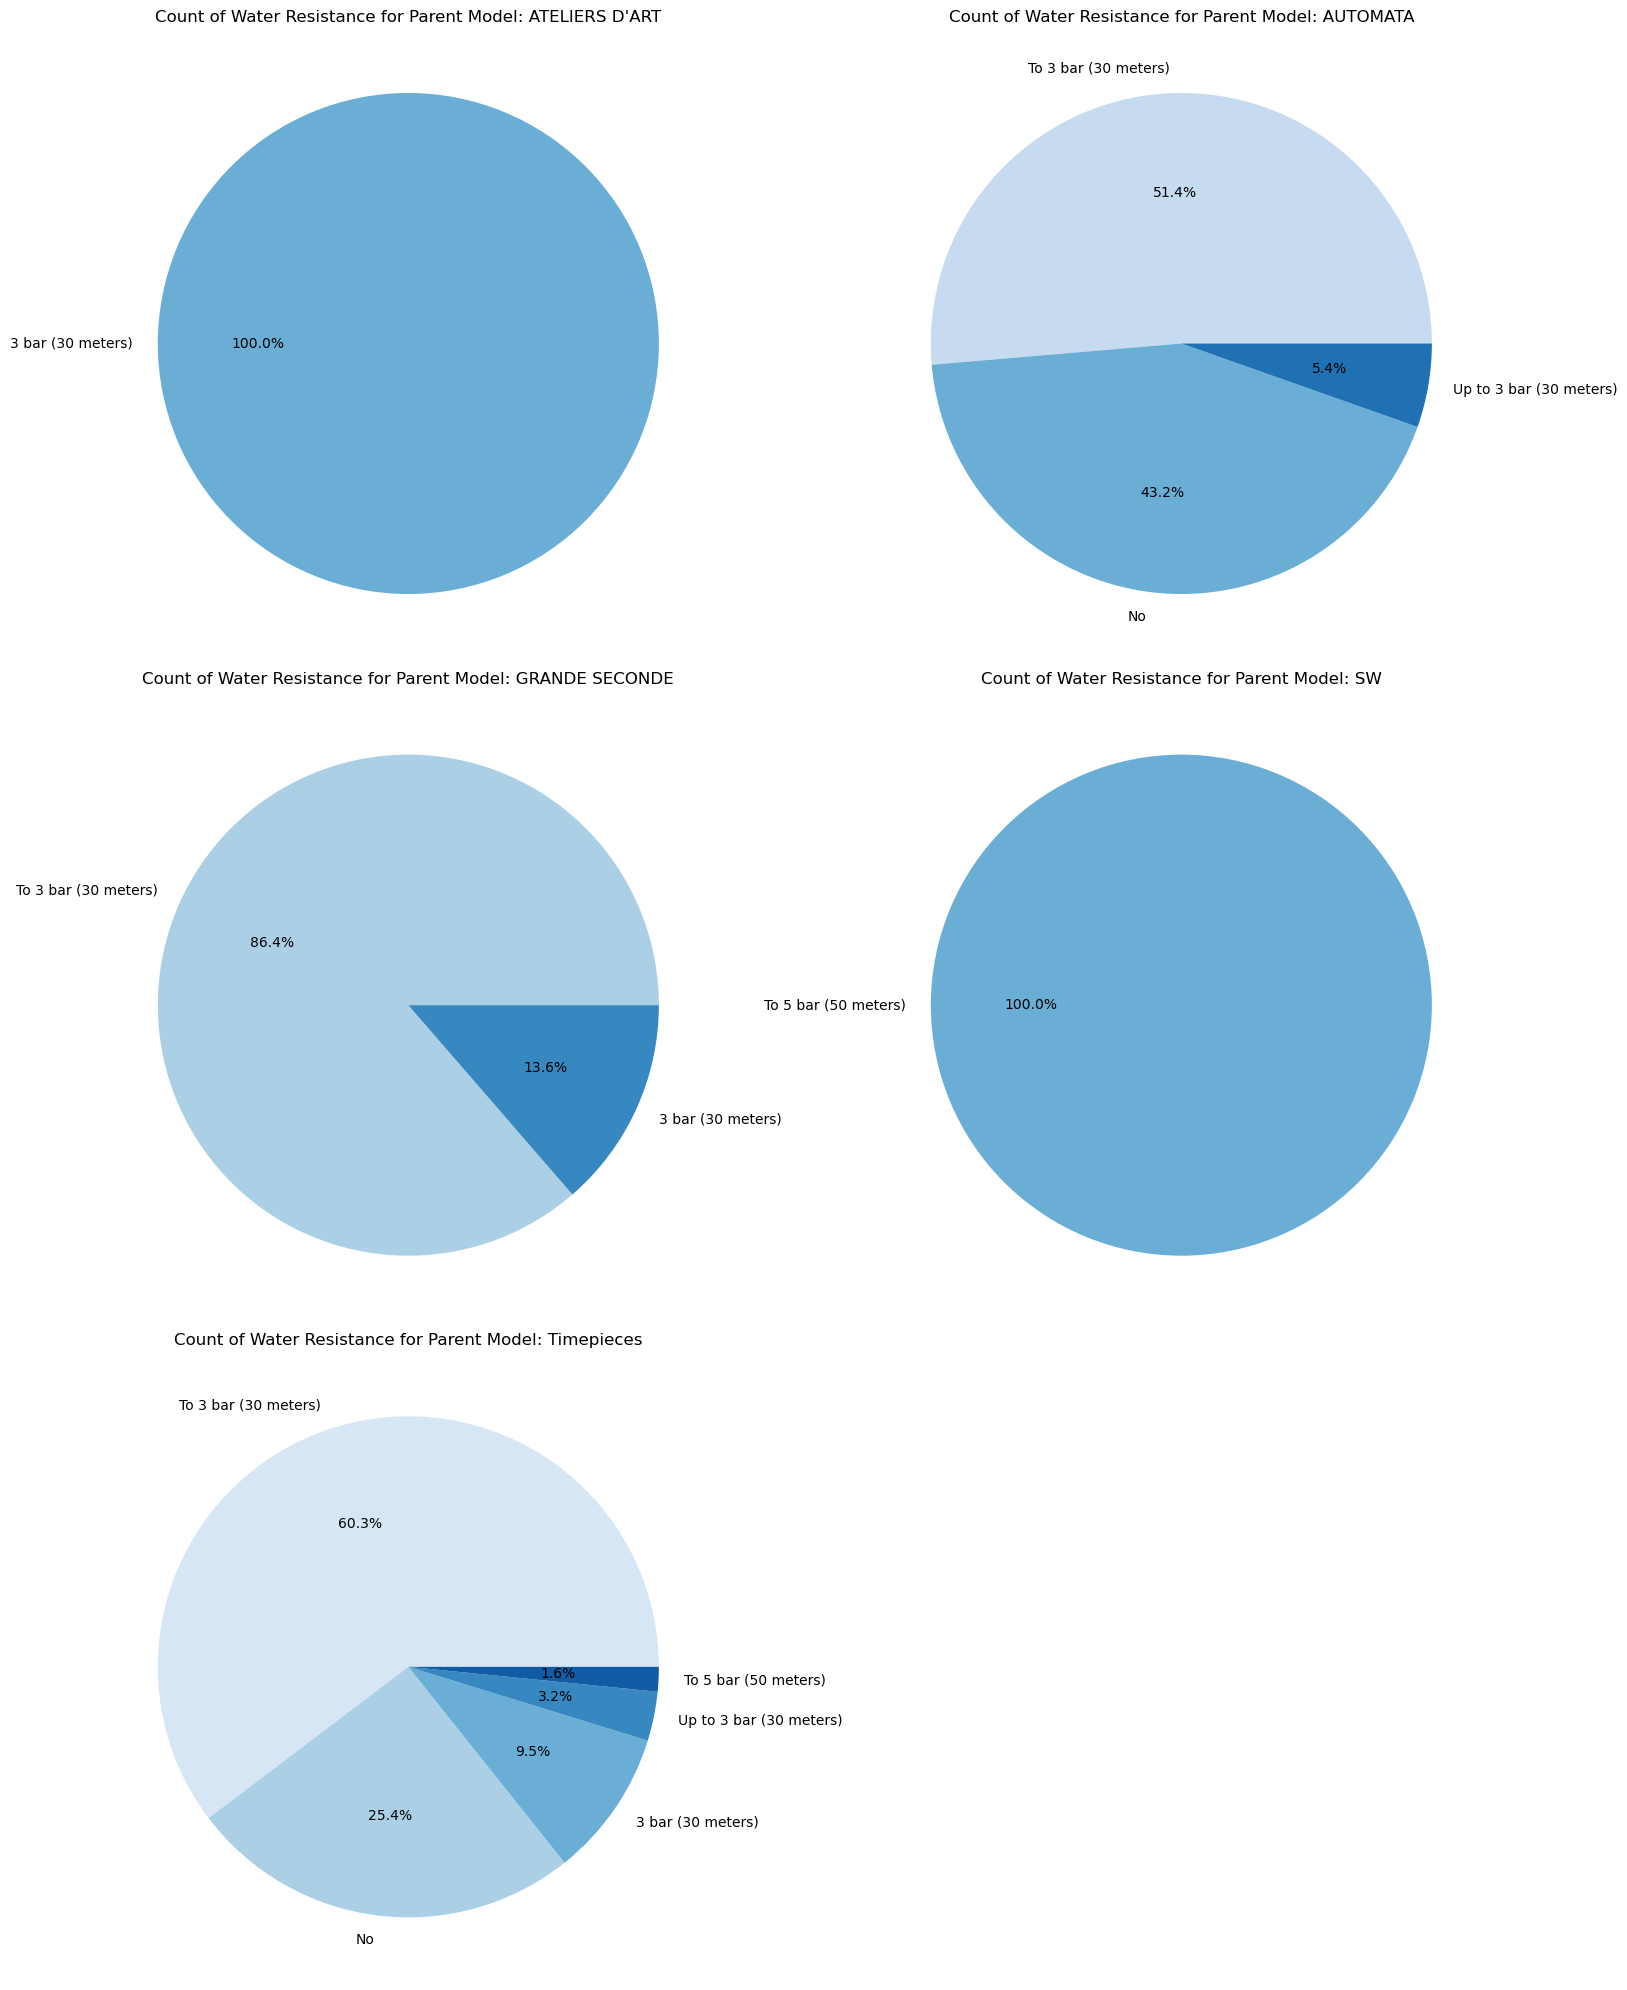

In [11]:
# Create a list of parent models
parent_models = grouped_df2['parent_model'].unique()

# Calculate the number of rows needed
num_rows = len(parent_models) // 2 + len(parent_models) % 2

# Create a figure with subplots, adjusting figsize for larger plots
fig, axes = plt.subplots(nrows=num_rows, ncols=2, figsize=(16, 20))

# Loop through each parent model and create two pie plots in each row
for i, model in enumerate(parent_models):
    row = i // 2
    col = i % 2

    subset_df = grouped_df2[grouped_df2['parent_model'] == model]
    subset_df = subset_df.sort_values('count', ascending=False)

    ax = axes[row, col]  # Select the corresponding subplot

    # Create the pie plot using matplotlib
    colors = sns.color_palette('Blues', len(subset_df))  # Generate a color palette
    sizes = subset_df['count'].values
    labels = subset_df['water_resistance'].values

    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%')
    ax.set_title(f'Count of Water Resistance for Parent Model: {model}')

# Remove any empty subplots
if len(parent_models) % 2 != 0:
    fig.delaxes(axes[-1, -1])

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**As we can notice from the graphs, ATELIERS D'ART and SW have only type of water resistance.
On the other hand, GRANDE SECONDE has two, and AUTOMATA has three.
While, Timepieces has many kinds of water resistance.**